### In this chapter, we will use plain RNNs and variants of RNNs on a sentiment classification task: processing the input sequence and predicting whether the sentiment is positive or negative.

We'll use the IMDb reviews dataset for this task. The dataset contains 50,000 movie reviews, along with their sentiment – 25,000 highly polar movie reviews for training and 25,000 for testing.

#### Loading Data

In [1]:
from tensorflow.keras.datasets import imdb

With the module imported, importing the dataset (tokenized and separated into train and test sets) is as easy as running imdb.load_data. The only parameter we need to provide is the vocabulary size we wish to use.

Here, we will specify a vocabulary size of 8,000 for our models.

In [2]:
vocab_size = 8000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

Let's inspect the X_train variable to see what we are working with.

In [3]:
print(type(x_train))
print(type(x_train[5]))
print(x_train[5])

<class 'numpy.ndarray'>
<class 'list'>
[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]


The next step is to define an upper limit on the length of the sequences that we'll work with and limit all sequences to the defined maximum length.

In [4]:
maxlen = 200

The next step is to get all our sequences to the same length using the pad_sequences utility from Keras.

#### Staging and Preprocessing Our Data

The pad_sequences utility from the sequences module in Keras helps us in getting all the sequences to a specified length. 

In [5]:
from tensorflow.keras import preprocessing

In [6]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [7]:
print(x_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24 

We can see that there are plenty of 0s at the beginning of the result. As you may have inferred, this is the padding that's done by the pad_sequence utility because the input sequence was shorter than 200. 

#### The Embedding Layer
The embedding layer is always the first layer in the model. You can follow it up with any architecture of your choice (RNNs, in our case).

#### Building the Plain RNN Model
#### Exercise 6.01: Building and Training an RNN Model for Sentiment Classification
In this exercise, we will build and train an RNN model for sentiment classification. Initially, we will define the architecture for the recurrent and prediction layers, and we will assess the model's performance on the test data. We will add the embedding layer and some dropout and complete the model definition by adding the RNN layer, dropout, and a dense layer to finish. Then, we'll check the accuracy of the predictions on the test data to assess how well the model generalizes. 

In [8]:
# set seeds for numpy and tensforflow for reproducible results
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

import all the necessary packages and layers and initializing a sequential model named model_rnn using the following commands:

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, Embedding, SpatialDropout1D, Dropout
model_rnn = Sequential()

2022-07-05 18:44:34.821227: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# embedding layer
model_rnn.add(Embedding(vocab_size, output_dim=32))
model_rnn.add(SpatialDropout1D(0.4)) # miniize overfitting

In [11]:
# SimpleRNN layer
model_rnn.add(SimpleRNN(32))

In [12]:
# Dropout layer
model_rnn.add(Dropout(0.4))

In [13]:
# Prediction layer (Dense)
model_rnn.add(Dense(1, activation='sigmoid')) # sigmoid because we have binary classification.

In [14]:
# compile the model and view summary
model_rnn.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, None, 32)         0         
 ropout1D)                                                       
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 258,113
Trainable params: 258,113
Non-trainable params: 0
__________________________________________________

We can see that there are 258,113 parameters, most of which are present in the embedding layer. The reason for this is that the word embeddings are being learned during the training – so we're learning the embedding matrix, which is of dimensionality vocab_size(8000) × output_dim(32).

In [15]:
# fit model on train data
history_rnn = model_rnn.fit(
    x_train, y_train,
    batch_size=128,
    validation_split=0.2, # gives us a sense of the model performance on unseen data.
    epochs=10
)

Epoch 1/10
157/157 [==============================] - 6s 35ms/step - loss: 0.6123 - accuracy: 0.6627 - val_loss: 0.4799 - val_accuracy: 0.7924
Epoch 2/10
157/157 [==============================] - 5s 34ms/step - loss: 0.4404 - accuracy: 0.8126 - val_loss: 0.3820 - val_accuracy: 0.8378
Epoch 3/10
157/157 [==============================] - 5s 33ms/step - loss: 0.3573 - accuracy: 0.8559 - val_loss: 0.3762 - val_accuracy: 0.8476
Epoch 4/10
157/157 [==============================] - 5s 34ms/step - loss: 0.3201 - accuracy: 0.8755 - val_loss: 0.4821 - val_accuracy: 0.8222
Epoch 5/10
157/157 [==============================] - 5s 34ms/step - loss: 0.2886 - accuracy: 0.8906 - val_loss: 0.3584 - val_accuracy: 0.8604
Epoch 6/10
157/157 [==============================] - 5s 34ms/step - loss: 0.2703 - accuracy: 0.8976 - val_loss: 0.3396 - val_accuracy: 0.8714
Epoch 7/10
157/157 [==============================] - 5s 34ms/step - loss: 0.2479 - accuracy: 0.9064 - val_loss: 0.6179 - val_accuracy: 0.8018

From the training output, we can see that the validation accuracy goes up to about 87%

In [16]:
# prediction on test data
y_test_pred = (model_rnn.predict(x_test) > 0.5).astype('int32') # use this when working on binary classification.
classes_x = np.argmax(y_test_pred, axis=1)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.83172


Overcome deprecated Sequential.predict_classes() method.

Multi-class classification - Softmax last layer
- np.argmax(model.predict(x), axis=-1)

Binary classification - Sigmoid last layer
- (model.predict(x) > 0.5).astype("int32")

We can see that the model does a decent job. We used a simple architecture with 32 neurons and used a vocabulary size of just 8000. Tweaking these and other hyperparameters may get you better results and you are encouraged to do so.

In this exercise, we have seen how to build an RNN-based model for text. We saw how an embedding layer can be used to derive word vectors for the task at hand. These word vectors are the representations for each incoming term, which are passed to the RNN layer. We have seen that even a simple architecture can give us good results. Now, let's discuss how this model can be used to make predictions on new, unseen reviews.

#### Making Predictions on Unseen Data
Our model (model_rnn) was trained on IMDb reviews that were tokenized, had their case lowered, had punctuation removed, had a defined vocabulary size, and were converted into a sequence of indices. Our function/pipeline for preparing data for the RNN model needs to perform the same steps.

In [17]:
# variable containing raw review text
inp_review = 'An excellent movie!'

The sentiment in the text is positive. If the model is working well enough, it should predict the sentiment as positive.

In [18]:
# text_to_word_sequence
from tensorflow.keras.preprocessing.text import text_to_word_sequence

The code above must tokenize this text into its constituent terms, normalize its case, and remove punctuation.

Check if it works as expected.

In [19]:
text_to_word_sequence(inp_review)

['an', 'excellent', 'movie']

In [20]:
# load vacabulary into dictionary named word_map
word_map = imdb.get_word_index()

In [21]:
# limit the mapping to 8000 terms by sorting word_map variable on index and picking the first 8000 terms to match what is used on the train data.
vocab_map = dict(sorted(word_map.items(), key=lambda x: x[1])[:vocab_size])

The vocab map will be a dictionary containing the term for index mapping for the 8000 terms in the vocabulary. Using this mapping, we'll convert the tokenized sentence into a sequence of term indices by performing a lookup for each term and returning the corresponding index.

In [22]:
# preprocess function that accepts raw text, applies the text_to_word_sequence utility to it, performs a lookup from vocab_map, and returns the corresponding sequence of integers
def preprocess(review):
    inp_tokens = text_to_word_sequence(review)
    seq = []
    for token in inp_tokens:
        seq.append(vocab_map.get(token))
        
    return seq

In [23]:
preprocess(inp_review)

[32, 318, 17]

This is the sequence of term indices corresponding to the raw text. Note that the data is now in the same format as the IMDb data we loaded. This sequence of indices can be fed to the RNN model (using the predict_classes method) to classify the sentiment, as shown in the following code. If the model is working well enough, it should predict the sentiment as positive

In [24]:
(model_rnn.predict([preprocess(inp_review)]) > 0.5).astype('int32')

array([[1]], dtype=int32)

The output prediction is 1 (positive), just as we expected

Let's apply the function to another raw text review and supply it to the model for prediction. Let's update the inp_review variable so that it contains the text "Don't watch this movie – poor acting, poor script, bad direction." The sentiment in the review is negative. We expect the model to classify it as such

In [25]:
inp_review = "Don't watch this movie - poor acting, poor script, bad direction."

In [26]:
(model_rnn.predict([preprocess(inp_review)]) > 0.5).astype('int32')

array([[0]], dtype=int32)

The predicted sentiment is negative, just as we would expect the model to behave.

#### LSTMs, GRUs, and Other Variants

#### Exercise 6.02: LSTM-Based Sentiment Classification Model
In this exercise, we will build a simple LSTM-based model to predict sentiment on our data. We will continue with the same setup we used previously (that is, the number of cells, embedding dimensions, dropout, and so on).

In [27]:
# LSTM layer
from tensorflow.keras.layers import LSTM

Instantiate the sequential model, add the embedding layer with the appropriate dimensions, and add a 40% spatial dropout

In [28]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, output_dim=32))
model_lstm.add(SpatialDropout1D(0.4))

In [29]:
# LSTM layer
model_lstm.add(LSTM(32))

In [30]:
# dropout and dense layers
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',metrics=['accuracy']
)
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          256000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, None, 32)         0         
 lDropout1D)                                                     
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 264,353
Trainable params: 264,353
Non-trainable params: 0
________________________________________________

We can see from the model summary that the number of parameters in the LSTM layer is 8320. A quick check can confirm that this is exactly four times the number of parameters in the plain RNN layer we saw in Exercise 6.01, Building and Training an RNN Model for Sentiment Classification, which is in line with our expectations.

In [31]:
# fit on training data for 5 epochs and batch size of 128
history_lstm = model_lstm.fit(
    x_train,
    y_train,
    batch_size=128,
    validation_split=0.2,
    epochs=5
)

Epoch 1/5
157/157 [==============================] - 12s 65ms/step - loss: 0.5299 - accuracy: 0.7315 - val_loss: 0.4013 - val_accuracy: 0.8332
Epoch 2/5
157/157 [==============================] - 10s 62ms/step - loss: 0.3298 - accuracy: 0.8709 - val_loss: 0.3489 - val_accuracy: 0.8568
Epoch 3/5
157/157 [==============================] - 10s 61ms/step - loss: 0.2689 - accuracy: 0.8972 - val_loss: 0.2847 - val_accuracy: 0.8798
Epoch 4/5
157/157 [==============================] - 9s 60ms/step - loss: 0.2397 - accuracy: 0.9112 - val_loss: 0.3224 - val_accuracy: 0.8832
Epoch 5/5
157/157 [==============================] - 10s 61ms/step - loss: 0.2163 - accuracy: 0.9187 - val_loss: 0.2984 - val_accuracy: 0.8850


In [32]:
# test data performance
y_test_pred_lstm = (model_lstm.predict(x_test) > 0.5).astype("int32")
print(accuracy_score(y_test, y_test_pred_lstm))

0.87288


The accuracy we got (87%) is a significant improvement from the accuracy we got using plain RNNs (83.2%). It looks like the extra parameters and the extra predictive power from the cell state came in handy for our task.

#### Exercise 6.03: GRU-Based Sentiment Classification Model
In this exercise, we will build a simple GRU-based model to predict sentiments in our data. We will continue with the same setup that we used previously (that is, the number of cells, embedding dimensions, dropout, and so on). Using GRUs instead of LSTMs in the model is as simple as replacing "LSTM" with "GRU" when adding the layer.

In [33]:
# import GRU layer
from tensorflow.keras.layers import GRU

In [34]:
model_gru= Sequential()
model_gru.add(Embedding(vocab_size, output_dim=32))
model_gru.add(SpatialDropout1D(0.4))

In [35]:
# GRU layer
model_gru.add(GRU(32, reset_after=False))

In [36]:
# dropout and dense layers
model_gru.add(Dropout(0.4))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',metrics=['accuracy']
)
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          256000    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, None, 32)         0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 32)                6240      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 262,273
Trainable params: 262,273
Non-trainable params: 0
________________________________________________

We can see from the model summary that the number of parameters in the LSTM layer is 8320. A quick check can confirm that this is exactly four times the number of parameters in the plain RNN layer we saw in Exercise 6.01, Building and Training an RNN Model for Sentiment Classification, which is in line with our expectations.

In [37]:
# fit on training data for 5 epochs and batch size of 128
history_gru = model_gru.fit(
    x_train,
    y_train,
    batch_size=128,
    validation_split=0.2,
    epochs=5
)

Epoch 1/5
157/157 [==============================] - 11s 63ms/step - loss: 0.5636 - accuracy: 0.6888 - val_loss: 0.3922 - val_accuracy: 0.8392
Epoch 2/5
157/157 [==============================] - 10s 61ms/step - loss: 0.3365 - accuracy: 0.8586 - val_loss: 0.3387 - val_accuracy: 0.8564
Epoch 3/5
157/157 [==============================] - 10s 61ms/step - loss: 0.2795 - accuracy: 0.8895 - val_loss: 0.3105 - val_accuracy: 0.8740
Epoch 4/5
157/157 [==============================] - 10s 63ms/step - loss: 0.2472 - accuracy: 0.9056 - val_loss: 0.3726 - val_accuracy: 0.8486
Epoch 5/5
157/157 [==============================] - 10s 64ms/step - loss: 0.2265 - accuracy: 0.9140 - val_loss: 0.3019 - val_accuracy: 0.8852


In [38]:
# predictions on test data
y_test_pred_gru = (model_gru.predict(x_test) > 0.5).astype("int32")
print(accuracy_score(y_test, y_test_pred_gru))

0.872


We can see that our accuracy (87.1%) is close to (87.3%) from LSTMs. GRUs are simplifications of LSTMs that aim to provide similar accuracy with fewer parameters.

#### Exercise 6.04: Bidirectional LSTM-Based Sentiment Classification Model
In this exercise, we will use bidirectional LSTMs to predict sentiment on our data. We'll be using the bidirectional wrapper from Keras to create bidirectional layers on LSTMs (you could create a bidirectional GRU model by simply replacing LSTM with GRU in the wrapper).

In [39]:
# Bidirectional layer
from tensorflow.keras.layers import Bidirectional

In [40]:
# Sequential model + Embedding layer
model_bilstm = Sequential()
model_bilstm.add(Embedding(vocab_size, output_dim=32))
model_bilstm.add(SpatialDropout1D(0.4))

In [41]:
# Bidirectional wrapper to an LSTM layer with 32 cells
model_bilstm.add(Bidirectional(LSTM(32)))

In [42]:
# Dropout + Dense layers; compile and model summary
model_bilstm.add(Dropout(0.4))
model_bilstm.add(Dense(1,activation='sigmoid'))
model_bilstm.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
model_bilstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          256000    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, None, 32)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 272,705
Trainable params: 272,705
Non-tr

In [43]:
# fit model_bilstm on training data for epochs=4, batch_size=128
history_bilstm = model_bilstm.fit(
    x_train,
    y_train,
    batch_size=128,
    validation_split=0.2,
    epochs=4
)

Epoch 1/4
157/157 [==============================] - 15s 82ms/step - loss: 0.5609 - accuracy: 0.7082 - val_loss: 0.4243 - val_accuracy: 0.8272
Epoch 2/4
157/157 [==============================] - 14s 89ms/step - loss: 0.3400 - accuracy: 0.8650 - val_loss: 0.3282 - val_accuracy: 0.8678
Epoch 3/4
157/157 [==============================] - 15s 95ms/step - loss: 0.2716 - accuracy: 0.8962 - val_loss: 0.3040 - val_accuracy: 0.8706
Epoch 4/4
157/157 [==============================] - 15s 95ms/step - loss: 0.2432 - accuracy: 0.9082 - val_loss: 0.3184 - val_accuracy: 0.8828


In [44]:
# predictions on test data
y_test_pred_bilstm = (model_bilstm.predict(x_test) > 0.5).astype('int32')
print(accuracy_score(y_test, y_test_pred_bilstm))

0.87412


#### Exercise 6.05: Stacked LSTM-Based Sentiment Classification Model
In this exercise, we will "go deeper" into the RNN architecture by stacking two LSTM layers to predict sentiment in our data. We will continue with the same setup that we used in the previous exercises (the number of cells, embedding dimensions, dropout, and so on) for the other layers. 

In [45]:
# Sequential model; Embedding layer; SpatialDropout1D
model_stack = Sequential()
model_stack.add(Embedding(vocab_size, output_dim=32))
model_stack.add(SpatialDropout1D(0.4))

In [46]:
# LSTM layer with 32 cells with return_sequences=True
model_stack.add(LSTM(32, return_sequences=True))

In [47]:
# LSTM layer with 32 cells
model_stack.add(LSTM(32))

In [48]:
# Dropout layer; Dense layer; compile; model summary
model_stack.add(Dropout(0.5))
model_stack.add(Dense(1,activation='sigmoid'))
model_stack.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
model_stack.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          256000    
                                                                 
 spatial_dropout1d_4 (Spatia  (None, None, 32)         0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                      

Note that the stacked LSTM model has the same number of parameters as the bidirectional model. 

In [49]:
# Fit the model on training data
history_stack = model_stack.fit(
    x_train,
    y_train,
    batch_size=128,
    validation_split=0.2,
    epochs=4
)

Epoch 1/4
157/157 [==============================] - 23s 127ms/step - loss: 0.5183 - accuracy: 0.7314 - val_loss: 0.3603 - val_accuracy: 0.8498
Epoch 2/4
157/157 [==============================] - 19s 122ms/step - loss: 0.3346 - accuracy: 0.8651 - val_loss: 0.3283 - val_accuracy: 0.8732
Epoch 3/4
157/157 [==============================] - 19s 121ms/step - loss: 0.2704 - accuracy: 0.8960 - val_loss: 0.2857 - val_accuracy: 0.8888
Epoch 4/4
157/157 [==============================] - 19s 123ms/step - loss: 0.2420 - accuracy: 0.9105 - val_loss: 0.2946 - val_accuracy: 0.8862


In [50]:
# predictions on test set
y_test_pred_stack = (model_stack.predict(x_test) > 0.5).astype('int32')
print(accuracy_score(y_test, y_test_pred_stack))

0.87652


#### Activity 6.01: Sentiment Analysis of Amazon Product Reviews
In this activity, we will build a sentiment classification model on Amazon product reviews. The data contains reviews for several categories of products. The original dataset, available at https://snap.stanford.edu/data/web-Amazon.html, is huge; therefore, we have sampled 50,000 reviews for this activity.

The sampled dataset, which has been split into train and test sets, can be found at https://packt.live/3iNTUjN.

This activity will bring together the concepts and methods we discussed in this chapter and those discussed in Chapter 4, Deep Learning for Text – Embeddings, and Chapter 5, Deep Learning for Sequences. You will begin by performing a detailed text cleanup and conduct preprocessing to get it ready for the deep learning model. You will also use embeddings to represent text. For the prediction part, you will employ stacked LSTMs (two layers) and two dense layers.

In [51]:
# punkt and stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
from nltk import tokenize

[nltk_data] Downloading package punkt to /Users/LNonyane/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LNonyane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
import pandas as pd

In [53]:
# testing tokenizer on toy data
sents = ['life is good', 'good life', 'good']
# import + instantiate tokenizer and fit on toy data
from tensorflow.keras.preprocessing.text import Tokenizer
tok = Tokenizer()

In [54]:
tok.fit_on_texts(sents)

In [55]:
# convert input text to corresponding sequence of indices for terms
tok.texts_to_sequences(sents)

[[2, 3, 1], [1, 2], [1]]

preprocessing

In [131]:
# read in the data files for the train and test sets
amazon_train_data = pd.read_csv('Amazon_reviews_train.csv')
amazon_test_data = pd.read_csv('Amazon_reviews_test.csv')

# examine the shapes of data sets
amazon_train_data.shape, amazon_test_data.shape

((25000, 2), (25000, 2))

In [57]:
amazon_train_data.columns

Index(['review_text', 'label'], dtype='object')

In [132]:
# separate the data sets from labels
train_raw = amazon_train_data['review_text'].values
train_labels  = amazon_train_data['label'].values

test_raw = amazon_test_data['review_text'].values
test_labels  = amazon_test_data['label'].values

# examine the shapes of the datasets
train_raw.shape, train_labels.shape, test_raw.shape, test_labels.shape

((25000,), (25000,), (25000,), (25000,))

Normalize the case and tokenize the test and train texts using NLTK's word_tokenize (after importing it, of course – hint: use list comprehension for cleaner code). Print the first review from the train data to check if the tokenization worked. Download punkt from NLTK if you haven't used the tokenizer before.

In [95]:
train_raw[0]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [133]:
# train data word tokenize
train_tokens = [tokenize.word_tokenize(sent.lower()) for sent in train_raw] # word tokenizing
#train_raw_words[0]

In [98]:
test_raw[0]

'Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"'

In [134]:
# test data word tokenize
test_tokens = [tokenize.word_tokenize(sent.lower()) for sent in test_raw] # word tokenizing
#test_raw_words[0]

In [135]:
# Define a function (drop_stop) to remove these tokens from any input (stopwords, punctuation) tokenized sentence.

# punctuation from the string module converted into a list
stop_punct = list(punctuation) # ! . ? [and many more]

# built-in stop words for English from NLTK
stop_nltk = stopwords.words('english') # they, my, mine, etc

# combined list that contains the punctuations as well as the NLTK stop words. Note that we can remove them together in one go
stop_final = stop_punct + stop_nltk

# drop_stop function
def drop_stop(input_tokens):
    return [token for token in input_tokens if token not in stop_final]

In [136]:
# Remove redundant tokens by applying the function to the tokenized sentences and store the result in a variable
# train set
train_tokens_nostop = [drop_stop(sent) for sent in train_tokens] 

# test set
test_tokens_nostop = [drop_stop(sent) for sent in test_tokens] 

# verify transformation on train & test set
print(train_tokens_nostop[0])
#print(test_tokens_nostop[0])

['stuning', 'even', 'non-gamer', 'sound', 'track', 'beautiful', 'paints', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'played', 'game', 'chrono', 'cross', 'games', 'ever', 'played', 'best', 'music', 'backs', 'away', 'crude', 'keyboarding', 'takes', 'fresher', 'step', 'grate', 'guitars', 'soulful', 'orchestras', 'would', 'impress', 'anyone', 'cares', 'listen', '^_^']


In [137]:
# use porter stemmer on the train & test data
from nltk.stem import PorterStemmer

# Instantiate the stemmer
stemmer_p = PorterStemmer()

# Apply the stemmer to the first sentence in train_raw_words_nostop
print([stemmer_p.stem(token) for token in train_tokens_nostop[0]])

['stune', 'even', 'non-gam', 'sound', 'track', 'beauti', 'paint', 'seneri', 'mind', 'well', 'would', 'recomend', 'even', 'peopl', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'game', 'ever', 'play', 'best', 'music', 'back', 'away', 'crude', 'keyboard', 'take', 'fresher', 'step', 'grate', 'guitar', 'soul', 'orchestra', 'would', 'impress', 'anyon', 'care', 'listen', '^_^']


It looks like plenty of modifications have been made by the stemmer. Many of the words aren't valid anymore but are still recognizable, and that's okay.

In [138]:
# porter stemmer on the rest of the data
# train
train_words_stem = [[stemmer_p.stem(token) for token in sent] for sent in train_tokens_nostop]

# test
test_words_stem = [[stemmer_p.stem(token) for token in sent] for sent in test_tokens_nostop]

In [113]:
print(train_words_stem[0])

['stune', 'even', 'non-gam', 'sound', 'track', 'beauti', 'paint', 'seneri', 'mind', 'well', 'would', 'recomend', 'even', 'peopl', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'game', 'ever', 'play', 'best', 'music', 'back', 'away', 'crude', 'keyboard', 'take', 'fresher', 'step', 'grate', 'guitar', 'soul', 'orchestra', 'would', 'impress', 'anyon', 'care', 'listen']


Create the strings for each of the train and text reviews. This will help us work with the utilities in Keras to create and pad the sequences. Create the train_texts and test_texts variables. Print the first review from the processed train data to confirm it.

In [139]:
train_texts = [" ".join(txt) for txt in train_words_stem]
test_texts = [" ".join(txt) for txt in test_words_stem]

In [142]:
print(train_texts[0])

stune even non-gam sound track beauti paint seneri mind well would recomend even peopl hate vid game music play game chrono cross game ever play best music back away crude keyboard take fresher step grate guitar soul orchestra would impress anyon care listen ^_^


From the Keras preprocessing utilities for text (keras.preprocessing.text), import the Tokenizer module. Define a vocabulary size of 10000 and instantiate the tokenizer with this vocabulary.

In [143]:
vocab_size = 10000

In [144]:
# instantiate Tokenizer and provide vocabulary size.
tokenizer = Tokenizer(num_words=vocab_size)

# Fit the tokenizer on the train texts.
tokenizer.fit_on_texts(train_texts)

# use the texts_to_sequences method of the tokenizer on the train and test sets to create the sequences for them.
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [145]:
print(train_sequences[0])

[22, 516, 7596, 85, 190, 184, 1097, 282, 20, 11, 1264, 22, 56, 370, 9662, 114, 41, 71, 114, 8159, 1453, 114, 51, 71, 29, 41, 58, 182, 2929, 2151, 76, 8160, 816, 2663, 829, 718, 3869, 11, 483, 120, 268, 109]


We need to find the optimal length of the sequences to process in the model. Get the length of the reviews from the train set into a list and plot the histogram of the lengths.

In [146]:
seq_lens = [len(seq) for seq in train_sequences]

In [147]:
import matplotlib.pyplot as plt

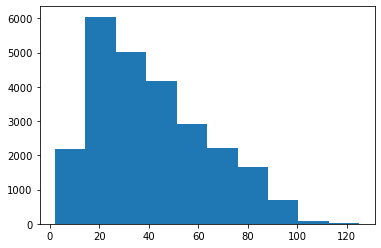

In [148]:
plt.hist(seq_lens)
plt.show()

The data is now in the same format as the IMDb data we used in the chapter. Using a sequence length of 100 (define the maxlen = 100 variable), use the pad_sequences method from the sequence module in Keras' preprocessing utilities (keras.preprocessing.sequence) to limit the sequences to 100 for both the train and test data. Check the shape of the result for the train data.

In [149]:
maxlen = 100

In [150]:
from keras.preprocessing.sequence import pad_sequences

In [151]:
x_train = pad_sequences(train_sequences, maxlen=maxlen)
x_test = pad_sequences(test_sequences, maxlen=maxlen)

To build the model, import all the necessary layers from Keras (embedding, spatialdropout, LSTM, dropout, and dense) and import the Sequential model. Initialize the Sequential model.

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense
model_rnn = Sequential()

In [153]:
# Add an embedding layer with 32 as the vector size (output_dim). Add a spatial dropout of 40%.
model_rnn.add(Embedding(vocab_size, output_dim=32))
model_rnn.add(SpatialDropout1D(0.4))

In [154]:
# Build a stacked LSTM model with 2 layers with 64 cells each. Add a dropout layer with 40% dropout.
model_rnn.add(LSTM(64, return_sequences=True))
model_rnn.add(LSTM(64))
model_rnn.add(Dropout(0.4))

In [155]:
"""
Add a dense layer with 32 neurons with relu activation, then a 50% dropout layer, 
followed by another dense layer of 32 neurons with relu activation, 
and follow this up with another dropout layer with 50% dropout.
"""

model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dropout(0.5))

In [156]:
# Add a final dense layer with a single neuron with sigmoid activation and compile the model. Print the model summary.
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
model_rnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 spatial_dropout1d_6 (Spatia  (None, None, 32)         0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, None, 64)          24832     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                      

In [158]:
# Fit the model on the training data with a 20% validation split and a batch size of 128. Train for 5 epochs.
amazon_history = model_rnn.fit(
    x_train,
    train_labels,
    batch_size=128,
    validation_split=0.2,
    epochs=5
)

Epoch 1/5
157/157 [==============================] - 17s 107ms/step - loss: 0.5742 - accuracy: 0.6914 - val_loss: 0.4644 - val_accuracy: 0.7878
Epoch 2/5
157/157 [==============================] - 17s 107ms/step - loss: 0.3790 - accuracy: 0.8525 - val_loss: 0.3658 - val_accuracy: 0.8344
Epoch 3/5
157/157 [==============================] - 17s 106ms/step - loss: 0.3185 - accuracy: 0.8860 - val_loss: 0.3508 - val_accuracy: 0.8416
Epoch 4/5
157/157 [==============================] - 19s 118ms/step - loss: 0.2750 - accuracy: 0.9004 - val_loss: 0.3845 - val_accuracy: 0.8526
Epoch 5/5
157/157 [==============================] - 19s 122ms/step - loss: 0.2523 - accuracy: 0.9086 - val_loss: 0.3512 - val_accuracy: 0.8528


prediction 

Make a prediction on the test set using the predict_classes method of the model. Using the accuracy_score method from scikit-learn, calculate the accuracy on the test set. Also, print out the confusion matrix.

In [159]:
# predictions on test set
test_preds = (model_rnn.predict(x_test) > 0.5).astype('int32')
print(accuracy_score(test_labels, test_preds))

0.86284


In [160]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, test_preds))

[[10721  1436]
 [ 1993 10850]]
